<a href="https://colab.research.google.com/github/MrPokko/MachineLearning_Ganjil/blob/main/JobSheet__12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 10 not upgraded.


In [80]:
import re
import os
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from google.colab.patches import cv2_imshow

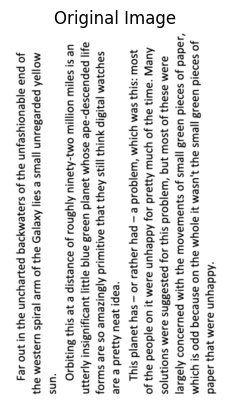

Detected Script: Latin
Detected Orientation Angle: 270


In [92]:
image = cv2.imread('/content/Images/hitchhikers-rotated.png')

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use Tesseract to detect script and orientation
script  = pytesseract.image_to_osd(gray, output_type=pytesseract.Output.DICT)['script']
angle =  pytesseract.image_to_osd(gray, output_type=pytesseract.Output.DICT)['orientation']
# Display the detected script and orientation
print(f"Detected Script: {script}")
print(f"Detected Orientation Angle: {angle}")

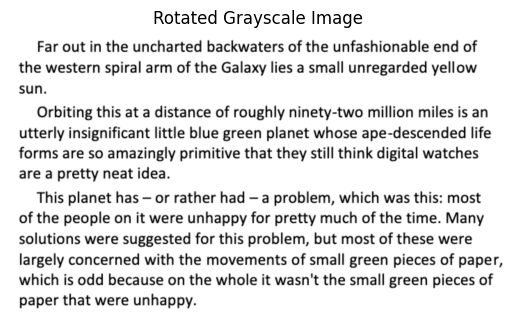

Detected Script (Boxes) - Rotated: Far out in the uncharted backwaters of the unfashionable end of
the western spiral arm of the Galaxy lies a small unregarded yellow
sun.

Orbiting this at a distance of roughly ninety-two million miles is an
utterly insignificant little blue green planet whose ape-descended life
forms are so amazingly primitive that they still think digital watches
are a pretty neat idea.

This planet has — or rather had — a problem, which was this: most
of the people on it were unhappy for pretty much of the time. Many
solutions were suggested for this problem, but most of these were
largely concerned with the movements of small green pieces of paper,
which is odd because on the whole it wasn't the small green pieces of
paper that were unhappy.



In [96]:
# Rotate the image 270 degrees clockwise
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
rotated_gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# Display the rotated image
plt.imshow(rotated_gray, cmap='gray')
plt.title('Rotated Grayscale Image')
plt.axis('off')
plt.show()

# Use Tesseract to detect script with custom configuration on rotated image
custom_config = r'--oem 3 --psm 6'
script_boxes_rotated = pytesseract.image_to_string(rotated_gray, config=custom_config)

# Display the detected script with custom configuration
print(f"Detected Script (Boxes) - Rotated: {script_boxes_rotated}")